<a href="https://www.kaggle.com/code/roybuchler/steam-exploratory-data-analysis?scriptVersionId=193208556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Steam Data Analysis**

In the following notebook, I will conduct data analysis on Steam Store sales. Steam is a video game digital distribution service. 
It allows users to download and play video games directly on their personal computer.
Exploring Steam Store sales will allow us to understand what factors drives revenue for the online platform. 

![](https://static0.gamerantimages.com/wordpress/wp-content/uploads/2024/03/steam-logo-1.jpg?q=50&fit=crop&w=1100&h=618&dpr=1.5)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'/kaggle/input/steam-store-games/steam.csv')

In [3]:
#By calling the info method, we see information about the DataFrame. 
#We can see that we don't directly need to treat discrepancies because of the absence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [4]:
#Comparing this to our previous line, we can see that there are 18 columns and 27,075 rows. Every row has a non-null value filled in their respective cell.
print(df.shape)

(27075, 18)


In [5]:
split_genres = df["genres"].str.split(";", n=2, expand=True)
split_genres

cleaned_df = pd.concat([df, split_genres], axis=1)

Thanks to string manipulation, I've split the genre column into multiple columns, which will allow to later dive into deeper analysis of games by genre. I have stored this new dataframe in a variable called "cleaned_df"

## Top 10 Games with the Highest Positive Rating

In [6]:
df_sorted = df.sort_values(by="positive_ratings", ascending=False)
top_10 = df_sorted.head(10)

In [7]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10['name'],
    y=top_10['positive_ratings'],
    name='positive ratings',
    marker_color='green'  # Set bar color to green
))

fig.update_layout(
    title='Top 10 Video Games with Most Positive Reviews by Review Count',
    xaxis_title='Video Game Name',
    yaxis_title='Count in thousands',
    xaxis_tickangle=-45,  # Rotate x-axis labels if needed
)

fig.show()

The graph above displays the top 10 video games with the most positive reviews by the number of reviews given by unique Steam users. 

As we can see, the number 1 rated game with the most reviews largely exceeds others at nearly 2.5 million positive reviews. 

Interestingly, while we have not yet dived into price analysis, it is necessary to note that the top 3 games in this chart are free of charge for Steam users. 

## Top 10 Games with  the Most Negative Ratings



In [8]:
df_sorted2 = df.sort_values(by="negative_ratings", ascending=False)
top_n_10 = df_sorted2.head(10)

In [9]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_n_10['name'],
    y=top_n_10['negative_ratings'],
    name='Negative Ratings',
    marker_color='orangered' 
))

fig.update_layout(
    title='Top 10 Video Games with Most Negative Reviews by Review Count',
    xaxis_title='Video Game Name',
    yaxis_title='Count in thousands',
    xaxis_tickangle=-45,  
)

fig.show()

Correspondingly, the top ten video games with the most negative reviews by count are the same top three video games with highest most positive review ratings. However, in different sequence of order, PUBG is the number one video game with the most negative reviews, while CS:GO remains second. In the next graph, we will explore an overlap of these two charts.

In [10]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_10['name'],
    y=top_10['positive_ratings'],
    name='Positive Ratings',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=top_n_10['name'],
    y=top_n_10['negative_ratings'],
    name='Negative Ratings',
    marker_color='red'
))


fig.update_layout(
    title='Positive and Negative Ratings',
    xaxis_title='Game',
    yaxis_title='Ratings',
    barmode='group' 
)

fig.show()

Taking from both the top 10 games with highest positive reviews and the top 10 games with most negative reviews, we can see the commonality factor. 

In [11]:
commonality = pd.merge(top_10, top_n_10, on=["appid", "positive_ratings", "negative_ratings"])
commonality

,appid,name_x,release_date_x,english_x,developer_x,publisher_x,platforms_x,required_age_x,categories_x,genres_x,...,platforms_y,required_age_y,categories_y,genres_y,steamspy_tags_y,achievements_y,average_playtime_y,median_playtime_y,owners_y,price_y
0,730,Counter-Strike: Global Offensive,2012-08-21,1,Valve;Hidden Path Entertainment,Valve,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,...,windows;mac;linux,0,Multi-player;Steam Achievements;Full controlle...,Action;Free to Play,FPS;Multiplayer;Shooter,167,22494,6502,50000000-100000000,0.00
1,570,Dota 2,2013-07-09,1,Valve,Valve,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,...,windows;mac;linux,0,Multi-player;Co-op;Steam Trading Cards;Steam W...,Action;Free to Play;Strategy,Free to Play;MOBA;Strategy,0,23944,801,100000000-200000000,0.00
2,578080,PLAYERUNKNOWN'S BATTLEGROUNDS,2017-12-21,1,PUBG Corporation,PUBG Corporation,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,...,windows,0,Multi-player;Online Multi-Player;Stats,Action;Adventure;Massively Multiplayer,Survival;Shooter;Multiplayer,37,22938,12434,50000000-100000000,26.99
3,271590,Grand Theft Auto V,2015-04-13,1,Rockstar North,Rockstar Games,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,...,windows,18,Single-player;Multi-player;Steam Achievements;...,Action;Adventure,Open World;Action;Multiplayer,77,9837,4834,10000000-20000000,24.99
4,218620,PAYDAY 2,2013-08-13,1,OVERKILL - a Starbreeze Studio.,Starbreeze Publishing AB,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,...,windows;linux,18,Single-player;Multi-player;Co-op;Online Co-op;...,Action;RPG,Co-op;Action;FPS,1130,3975,890,10000000-20000000,7.49


We can further explore the commonality factor in the above merged tables. A total of 5 video games appear in both top 10 highest/lowest ratings chart.

## Distribution of Genre

Let's go back to our original cleaned dataset we passed to our variable earlier with multiple categories of genre per video game. Let's run some tests to see what are the top genres for Steam games.

In [12]:
cleaned_df.count()

appid               27075
name                27075
release_date        27075
english             27075
developer           27074
publisher           27061
platforms           27075
required_age        27075
categories          27075
genres              27075
steamspy_tags       27075
achievements        27075
positive_ratings    27075
negative_ratings    27075
average_playtime    27075
median_playtime     27075
owners              27075
price               27075
0                   27075
1                   23032
2                   15017
dtype: int64

Here, we can see that all video games have at least one genre assigned to them. 
Most of them have a second genre, while between 50-60% of video games have a third genre assigned to them

In [13]:
steam_genres = cleaned_df[0].value_counts()

top_5_genres = steam_genres.head()

fig = go.Figure()


fig.add_trace(go.Bar(
    x=top_5_genres.index,   # Genres as x-axis
    y=top_5_genres.values,  # Counts as y-axis
    name='Count',
    marker_color='skyblue'  # You can customize the color
))

fig.update_layout(
    title='Top 5 Steam Game Genres',
    xaxis_title='Genre',
    yaxis_title='Count',
)

fig.show()

In [14]:
steam_genres = cleaned_df[1].value_counts()
top_5_2nd_genres = steam_genres.head()
top_5_2nd_genres

1
Indie         8691
Adventure     4342
Casual        4321
Simulation    1230
Strategy       959
Name: count, dtype: int64

In [15]:
steam_genres = cleaned_df[2].value_counts()
top_5_3rd_genres = steam_genres.head()
top_5_3rd_genres

2
Indie           3411
Strategy        1425
RPG              888
Simulation       871
Early Access     714
Name: count, dtype: int64

Despite the popularity of action video games, we can see from glancing at the other categories that Action is much less popular in 2nd and 3rd genre categories. 

However, Adventure is the second most popular 1st genre category, yet it dominates in the 2nd genre with over 4,000 video games! 

Similarly, although Indie places fourth in the first genre category, it ranks number one in both 2nd and 3rd genre categories. 

From this, although we can glean that action video games are well distributed among the Steam platform, there are a large number of available adventure and indie video games.

# Steam Games Ownership

Let's fictiously create an average ownership category of the ownership column in order to derive an estimated number of revenue for video game genre.



In [16]:
df_copy = cleaned_df.copy()
#creating a copy of original df to work on this one 

In [17]:
df_copy[['lower', 'upper']] = df_copy['owners'].str.split('-', expand= True)
df_copy['lower'] = df_copy['lower'].astype('int')
df_copy['upper'] = df_copy['upper'].astype('int')
df_copy['avg_ownership'] = (df_copy['lower'] + df_copy['upper']) / 2

#Creating a new average ownership column to derive our calculations 

In [18]:
df_copy['avg_ownership'] = df_copy['avg_ownership'].astype(int)
df_copy.sort_values(by = 'avg_ownership', ascending = False).head(10)[['name','avg_ownership']]


,name,avg_ownership
22,Dota 2,150000000
25,Counter-Strike: Global Offensive,75000000
12836,PLAYERUNKNOWN'S BATTLEGROUNDS,75000000
19,Team Fortress 2,35000000
3362,Unturned,35000000
1634,Warframe,35000000
1727,War Thunder,15000000
23,Portal 2,15000000
1025,The Elder Scrolls V: Skyrim,15000000
1467,PAYDAY 2,15000000


# Estimating Revenue 

In [19]:
df_copy['hypothetical_revenue'] = df_copy['price'] * df_copy['avg_ownership']

In [20]:
steam_revenue = df_copy.sort_values(by='hypothetical_revenue', ascending=False)
#Here, I am sorting this DataFrame by hypothetical revenue to see if we can derive insight
#Our aim is to see correlation between genre and our hypothetical revenue variable 

genre_revenue = steam_revenue.groupby(0)['hypothetical_revenue'].sum().reset_index()

sorted_genre_revenue = genre_revenue.sort_values(by='hypothetical_revenue', ascending=False)

top_3_genre_revenue = sorted_genre_revenue.head(5)

In [21]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=top_3_genre_revenue[0],  
    y=top_3_genre_revenue['hypothetical_revenue'],  
    name='Hypothetical Revenue',
    marker_color='limegreen'
))


fig.update_layout(
    title='Estimated Revenue by Genre',
    xaxis_title='Genre',
    yaxis_title='Estimated Revenue',
    xaxis_tickangle=-45,  
    xaxis=dict(tickmode='array')  
)


fig.show()

By far, sales based on average ownership is the highest for Action video games, followed by Adventure, then by Indie. Video games with 'Action' as their first genre outperform other categories almost 7x.

# Total Yearly Sales

In [22]:
df_copy['release_date'] = pd.to_datetime(df_copy['release_date'])

df_copy['year'] = df_copy['release_date'].dt.year
df_copy['month'] = df_copy['release_date'].dt.month
df_copy['day'] = df_copy['release_date'].dt.day
df_copy

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,0,1,2,lower,upper,avg_ownership,hypothetical_revenue,year,month,day
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,Action,None,None,10000000,20000000,15000000,107850000.0,2000,11,1
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,Action,None,None,5000000,10000000,7500000,29925000.0,1999,4,1
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,Action,None,None,5000000,10000000,7500000,29925000.0,2003,5,1
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,Action,None,None,5000000,10000000,7500000,29925000.0,2001,6,1
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,Action,None,None,5000000,10000000,7500000,29925000.0,1999,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,...,Adventure,Casual,Indie,0,20000,10000,20900.0,2019,4,24
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,...,Action,Adventure,Indie,0,20000,10000,16900.0,2019,4,23
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,...,Action,Casual,Indie,0,20000,10000,39900.0,2019,4,24
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,...,Adventure,Casual,Indie,0,20000,10000,51900.0,2019,4,17


In [23]:
annual_revenue = df_copy.groupby('year')['hypothetical_revenue'].sum().reset_index()
annual_revenue.tail(5)

,year,hypothetical_revenue
18,2015,4.069099e+09
19,2016,4.056603e+09
20,2017,4.949750e+09
21,2018,3.129128e+09
22,2019,7.371966e+08


In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=annual_revenue['year'],  
    y=annual_revenue['hypothetical_revenue'],
    mode='lines+markers',  
    name='Estimated Revenue',
    line=dict(color='deepskyblue', width=2), 
    marker=dict(size=8) 
))

fig.update_layout(
    title='Estimated Revenue by Year',
    xaxis_title='Year',
    yaxis_title='Estimated Revenue',
    xaxis=dict(type='category'), 
    yaxis=dict(tickprefix='$')  
)

fig.show()

From this graph, we can see that the highest revenue from sales was in 2017. There has been steady increase in sales of video games in the past decade, totalling with nearly $5 billion in sales in 2017 alone. We can forego years 2018 and 2019 as they are likely years without available data. 

# Highest grossing genres in 2017

In [25]:
df_17 = df_copy[df_copy['year'] == 2017]
df_17.sort_values(by=0, ascending=False)
df_17_genre = df_17.groupby(0)['hypothetical_revenue'].sum().reset_index()
df_17_genre_sorted = df_17_genre.sort_values(by='hypothetical_revenue', ascending=False)

df_17_genre_sorted.head(10)

,0,hypothetical_revenue
0,Action,3.652734e+09
1,Adventure,4.379496e+08
16,Simulation,2.145568e+08
10,Indie,1.684722e+08
22,Violent,9.615635e+07
4,Casual,7.826840e+07
14,Racing,7.371665e+07
19,Strategy,6.421815e+07
15,Sexual Content,5.630895e+07
13,RPG,4.580125e+07


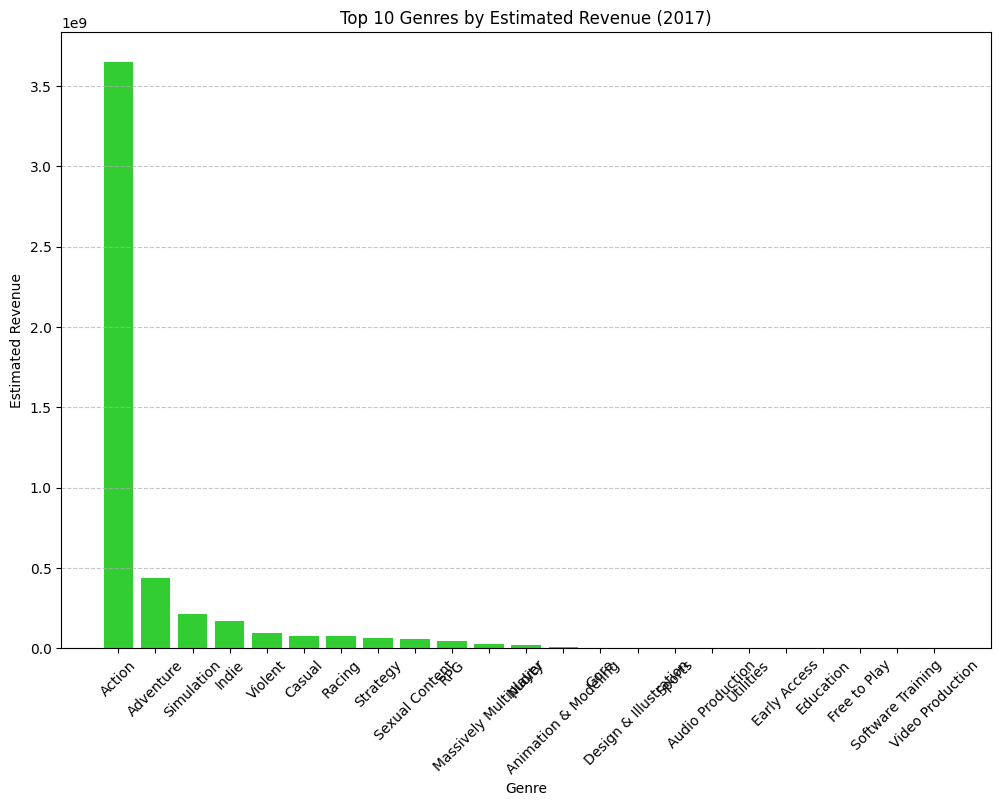

In [26]:
plt.figure(figsize=(12, 8))
plt.bar(df_17_genre_sorted[0], df_17_genre_sorted['hypothetical_revenue'], color='limegreen')
plt.title('Top 10 Genres by Estimated Revenue (2017)')
plt.xlabel('Genre')
plt.ylabel('Estimated Revenue')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Action remains a major popular category and accounts for the majority of sales in the most successful year for steam.

# Basic statistical exploration

In [27]:
avg_price = df_copy.groupby('year')["price"].mean()
std_price = df_copy.groupby('year')['price'].std()
med_price = df_copy.groupby('year')['price'].median()
print(avg_price)
print(std_price)
print(med_price)

year
1997    5.990000
1998    7.190000
1999    3.990000
2000    5.590000
2001    1.995000
2002    7.990000
2003    2.993333
2004    5.758333
2005    4.026667
2006    7.558542
2007    5.633011
2008    6.535241
2009    6.990393
2010    7.388866
2011    7.527824
2012    8.588563
2013    8.694737
2014    7.462797
2015    6.419072
2016    5.893765
2017    5.891822
2018    5.565001
2019    6.191536
Name: price, dtype: float64
year
1997         NaN
1998         NaN
1999    0.000000
2000    2.262742
2001    2.303628
2002         NaN
2003    2.640082
2004    3.252017
2005    3.196002
2006    6.667435
2007    3.576325
2008    4.078753
2009    3.838129
2010    5.489137
2011    5.589758
2012    8.086504
2013    7.439775
2014    6.920957
2015    6.487895
2016    7.058503
2017    8.706767
2018    8.573877
2019    7.225079
Name: price, dtype: float64
year
1997    5.990
1998    7.190
1999    3.990
2000    5.590
2001    1.995
2002    7.990
2003    3.990
2004    7.190
2005    5.490
2006    5.990
2007   

Thanks to different functions (average, standard deviation, and median) we can see what stakeholders involved in selling video games should consider as factors in terms of pricing their game. From 2012 onward, the average prices of video games has gone down significantly.

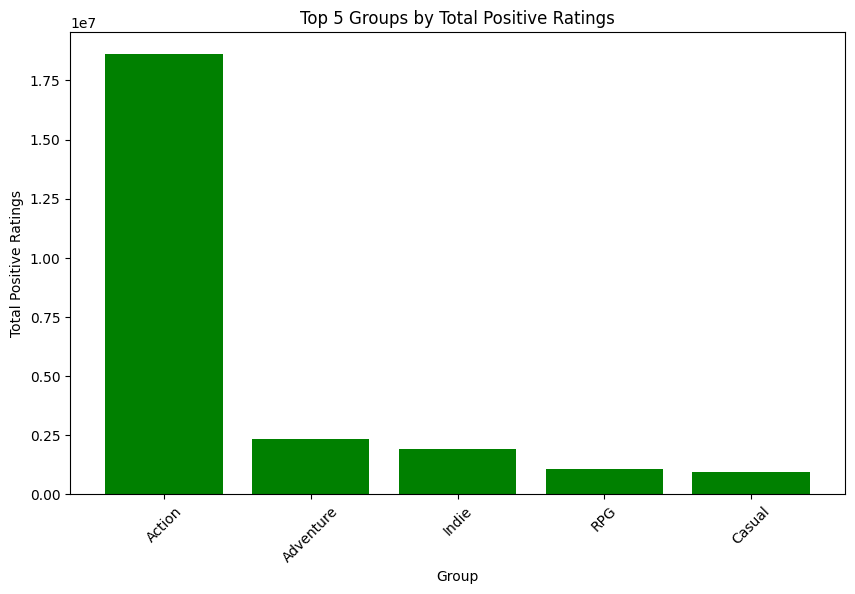

In [28]:
df_grouped_sum = df_copy.groupby(0)['positive_ratings'].sum().reset_index()
df_sorted2 = df_grouped_sum.sort_values(by='positive_ratings', ascending=False)
df_sorted_top5 = df_sorted2.head(5)

plt.figure(figsize=(10, 6))
plt.bar(df_sorted_top5[0], df_sorted_top5['positive_ratings'], color='green')
plt.xlabel('Group')
plt.ylabel('Total Positive Ratings')
plt.title('Top 5 Groups by Total Positive Ratings')
plt.xticks(rotation=45)
plt.show()

# Insights

* Steam derives main sales from Action video games, which accounts for over 11,000 games in the steam store currently. 

* The best year for Steam Store sales was 2017, which saw over 5 billion in revenue. 

* Of this revenue, Action video games played a big part in sales (Over 3.5b in sales in 2017 was from Action video games alone). 

* In comparison, Action video games sold for a total of 20B since available data around Steam's launch in 1997. 2017 was a big year.

* It's still uncertain the effect of reviews has on sales. We can say that Action video games received a high number of positive reviews, but the top 10 games with most positive reviews also exist in the list of top 10 games with most negative reviews. 

* Outside of Action, Adventure and Casual video game genres are highly popular. 

* The price of video games has been steadily decreasing in the recent decade. This should be kept in mind as developers make video games.
